In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cc.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df.shape[0]

7043

In [7]:
df["Churn"].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [8]:
# binary classification

In [9]:
# 100 -> 73  No, 27 Yes

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# df.isna().sum()

In [12]:
pd.options.display.max_columns = None

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df["gender"].value_counts().shape[0]

2

In [15]:
len(df["gender"].unique())

2

In [16]:
b_c = []

for i in df.columns:
    vc = df[i].value_counts().shape[0] # df["gender"].unique()
    if vc == 2:
        b_c.append(i)

In [17]:
b_c

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [18]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

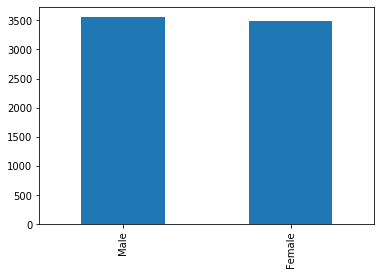

In [19]:
df['gender'].value_counts().plot(kind = "bar")

Text(0.5, 0, 'gender')

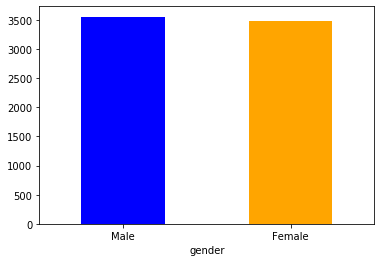

In [20]:
df['gender'].value_counts().plot.bar(rot = 0, color = ["blue", "orange"])
plt.xlabel("gender")

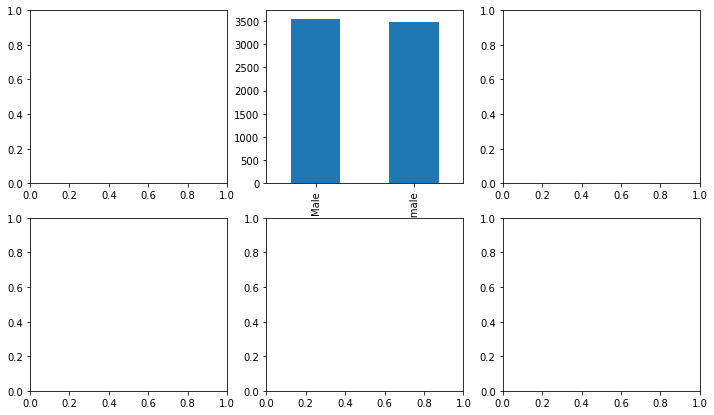

In [21]:
fig, axes = plt.subplots(nrows =2 , ncols = 3, figsize =(12,7) )

df['gender'].value_counts().plot.bar(ax = axes[0,1])
plt.show()

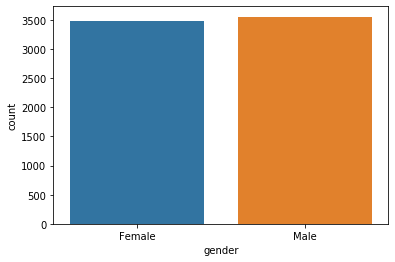

In [22]:
sns.countplot(data = df, x = "gender")

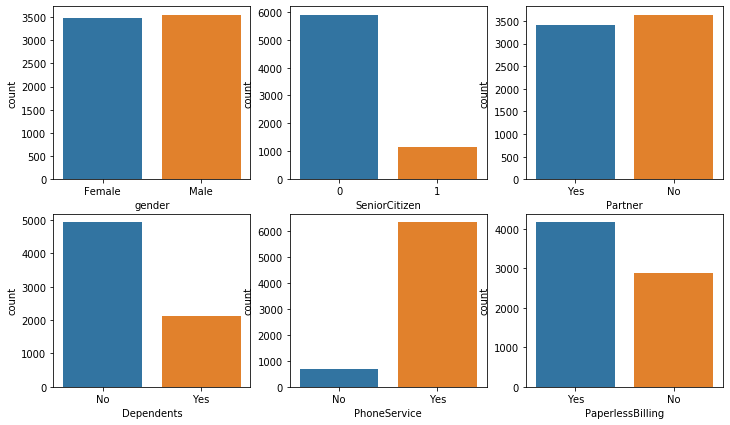

In [23]:
fig, axes = plt.subplots(nrows =2 , ncols = 3, figsize =(12,7) )
sns.countplot(data = df, x = "gender", ax = axes[0,0])
sns.countplot(data = df, x = 'SeniorCitizen', ax = axes[0,1])
sns.countplot(data = df, x = 'Partner', ax = axes[0,2])
sns.countplot(data = df, x = 'Dependents', ax = axes[1,0])
sns.countplot(data = df, x = 'PhoneService', ax = axes[1,1])
sns.countplot(data = df, x = 'PaperlessBilling', ax = axes[1,2])
plt.show()

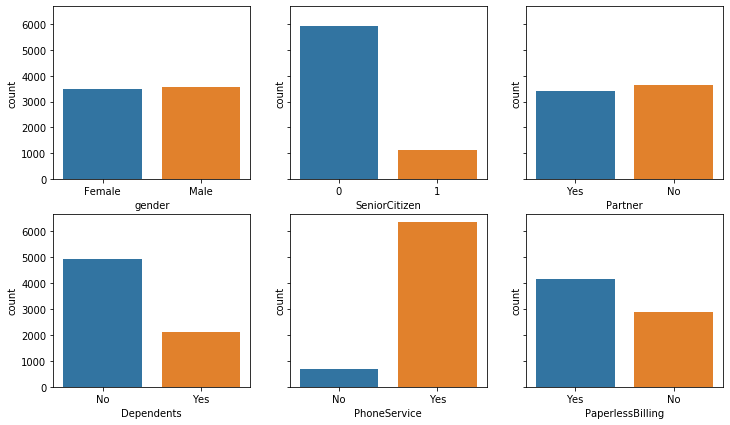

In [24]:
fig, axes = plt.subplots(nrows =2 , ncols = 3, figsize =(12,7), sharey = True)
sns.countplot(data = df, x = "gender", ax = axes[0,0])
sns.countplot(data = df, x = 'SeniorCitizen', ax = axes[0,1])
sns.countplot(data = df, x = 'Partner', ax = axes[0,2])
sns.countplot(data = df, x = 'Dependents', ax = axes[1,0])
sns.countplot(data = df, x = 'PhoneService', ax = axes[1,1])
sns.countplot(data = df, x = 'PaperlessBilling', ax = axes[1,2])
plt.show()

In [25]:
df["Churn"].replace({"Yes":1, "No":0}, inplace = True)

In [26]:
df.groupby("gender")["Churn"].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [27]:
c = ['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

for i in c:
    print(df.groupby(i)["Churn"].mean())

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64
PaperlessBilling
No     0.163301
Yes    0.335651
Name: Churn, dtype: float64


In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
df[['PhoneService','MultipleLines']].head(25)

,PhoneService,MultipleLines
0,No,No phone service
1,Yes,No
2,Yes,No
3,No,No phone service
4,Yes,No
5,Yes,Yes
6,Yes,Yes
7,No,No phone service
8,Yes,Yes
9,Yes,No


In [30]:
# df[['PhoneService','MultipleLines']]

In [31]:
inter = ['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

In [32]:
for i in inter:
    print(df[i].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


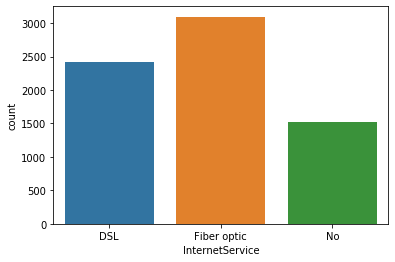

In [33]:
sns.countplot(data = df, x = 'InternetService')
plt.show()

In [34]:
df.pivot_table(index = "InternetService", values = "Churn", aggfunc = "mean")

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [35]:
3096*0.418928

1297.001088

In [36]:
df.groupby("InternetService")['MonthlyCharges'].mean()

InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

In [37]:
for i in inter:
    print(df.groupby(i)["Churn"].mean())

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64
TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn, dtype: float64
StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64
StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn, dtype: float64


In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [40]:
df.groupby("Contract")['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [41]:
df.groupby("Contract")['Churn'].mean()

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

In [42]:
# pros cons

In [43]:
df.groupby('PaymentMethod')['Churn'].mean()

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64

In [44]:
df[['MonthlyCharges', 'TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7043 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


In [45]:
df['TotalCharges'].value_counts(dropna = False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [46]:
df['TotalCharges'].astype(float)

ValueError: could not convert string to float: 

In [47]:
tc = df["tenure"]*df["MonthlyCharges"]

In [48]:
df['TotalCharges'].value_counts().index

Index([' ', '20.2', '19.75', '20.05', '19.9', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '3306.85', '424.75', '6565.85', '2117.2', '203.95', '6849.4', '692.35',
       '130.15', '3211.9', '6844.5'],
      dtype='object', length=6531)

In [49]:
df['TotalCharges'] = tc

In [50]:
df['TotalCharges']

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: TotalCharges, Length: 7043, dtype: float64

In [51]:
df[["MonthlyCharges",'TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651566
TotalCharges,0.651566,1.000000


In [52]:
df[["Contract", "tenure"]]

,Contract,tenure
0,Month-to-month,1
1,One year,34
2,Month-to-month,2
3,One year,45
4,Month-to-month,2
...,...,...
7038,One year,24
7039,One year,72
7040,Month-to-month,11
7041,Month-to-month,4


In [53]:
df[["Contract", "tenure"]].groupby("Contract").mean() # utmost

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
d = ['customerID', 'gender','PhoneService', 'Contract', 'TotalCharges']

In [56]:
df.drop(d, axis = "columns", inplace = True)

In [57]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Data Preprocessing

In [58]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory

In [61]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [66]:
df["PaymentMethod"].astype("category").head()

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: PaymentMethod, dtype: category
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

In [65]:
df["PaymentMethod"].astype("category").cat.codes.value_counts()

2    2365
3    1612
0    1544
1    1522
dtype: int64

In [67]:
df["PaymentMethod"].astype("category").cat.codes.head()

0    2
1    3
2    3
3    0
4    2
dtype: int8

In [ ]:
# ordinal -> order 

In [69]:
pd.Categorical(df["PaymentMethod"]).codes

array([2, 3, 3, ..., 2, 3, 0], dtype=int8)

In [119]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [73]:
le = LabelEncoder()

In [74]:
le.fit_transform(df["PaymentMethod"])

array([2, 3, 3, ..., 2, 3, 0])

In [75]:
df["PaymentMethod"]

# one hot encoding 
Electronic check  Mailed check  Bank transfer (automatic) Credit card (automatic)

   1                  0               0                           0
    0                 1              0                           0
    0                  1              0                           0
    0                  0              1                          0

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [76]:
pd.get_dummies(df["PaymentMethod"])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [92]:
ohe = OneHotEncoder()

In [82]:
import numpy as np

In [96]:
pm = np.array(df["PaymentMethod"]).reshape(-1, 1)

In [98]:
for i in ohe.fit(pm):
    print(i)

TypeError: 'OneHotEncoder' object is not iterable

In [101]:
ohe.fit(np.array(df["PaymentMethod"]).reshape(1, -1))

OneHotEncoder()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory

In [103]:
o = []


for c in df.columns:
    print(df[c].dtype)

int64
object
object
int64
object
object
object
object
object
object
object
object
object
object
float64
int64


In [105]:
o = []


for c in df.columns:
    if df[c].dtype == "object":
        # print(c)
        o.append(c)

In [107]:
print(o)

['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [108]:
df[o]

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check
1,No,No,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic)
4,No,No,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic)
7040,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check
7041,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check


In [116]:
x =pd.get_dummies(df[o],drop_first = True)

In [117]:
x 

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1
7039,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0
7040,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [118]:
df[["tenure","MonthlyCharges", "SeniorCitizen"]]

,tenure,MonthlyCharges,SeniorCitizen
0,1,29.85,0
1,34,56.95,0
2,2,53.85,0
3,45,42.30,0
4,2,70.70,0
...,...,...,...
7038,24,84.80,0
7039,72,103.20,0
7040,11,29.60,0
7041,4,74.40,1


In [122]:
mm = MinMaxScaler()

t = mm.fit_transform(df[["tenure"]])
mc = mm.fit_transform(df[["MonthlyCharges"]])

In [124]:
t.min()

0.0

In [125]:
t.max()

1.0

In [126]:
x["tenure"] = t
x["MonthlyCharges"] = mc
x["SeniorCitizen"] = df["SeniorCitizen"]

In [127]:
x.head()

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.013889,0.115423,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.472222,0.385075,0
2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.027778,0.354229,0
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.625000,0.239303,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.027778,0.521891,0


In [128]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [129]:
x.shape

(7043, 25)

In [131]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [132]:
x["Churn"] = df["Churn"]

In [133]:
x["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [134]:
churn_yes = x[x["Churn"] == 1]
churn_no  = x[x["Churn"] == 0]

In [136]:
churn_yes["Churn"].unique()

array([1], dtype=int64)

In [137]:
churn_no["Churn"].unique()

array([0], dtype=int64)

In [159]:
x_yes_up = churn_yes.sample(5174, random_state = 42, replace = True)  # 0-9 -> 4   7722

In [160]:
x_yes_up.shape

(5174, 26)

In [163]:
bol = x_yes_up.duplicated()

In [164]:
x_yes_up[bol]

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen,Churn
3671,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.013889,0.565672,0,1
3662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.125000,0.267662,0,1
4949,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0.069444,0.325871,0,1
5628,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0.180556,0.780100,0,1
1926,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0.680556,0.811443,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0.708333,0.408458,0,1
4851,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.041667,0.518905,1,1
2567,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0.833333,0.771144,0,1
2054,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.027778,0.309950,0,1


In [165]:
# upsampled = pd.concat([x_yes_up,churn_no], axis = 0)

upsampled =x_yes_up.append(churn_no)

In [166]:
5174*2

10348

In [167]:
upsampled.shape

(10348, 26)

In [170]:
upsampled.reset_index(drop = True, inplace = True)

In [172]:
upsampled["Churn"].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [173]:
x = upsampled.drop("Churn", axis = 1).copy()
y = upsampled["Churn"].copy()

In [177]:
x.shape

(10348, 25)

In [178]:
y.shape

(10348,)

In [ ]:
10348*.8 = Training
10348*.2  = Testing

In [175]:
# 10348*.8 = 8278 Training

# 10348 - 8278  = 2070  Test

2070

In [176]:
from sklearn.model_selection import train_test_split

In [179]:
x_train, x_test, y_train,y_test= train_test_split(x,y,
                                                  test_size = 0.2, random_state = 42)

In [180]:
# Linear_regression -> Regression
# Logistic_regression -> Classfication

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

In [183]:
churn_predict = lg.predict(x_test)

In [184]:
churn_actual = y_test

In [185]:
(churn_actual == churn_predict).sum()

1580

In [186]:
1580*100/2070

76.32850241545894

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
rm = RandomForestClassifier()

In [193]:
rm.fit(x_train, y_train)
prediction = rm.predict(x_test)

In [194]:
((prediction == churn_actual).sum())/2070

0.8980676328502415

In [195]:
# Logistic /linear regression

y = mx + c

curve = $x^2$ + 2x+3

$H_2O$

In [ ]:
winter - books sell
winter - soup sell

In [196]:
x_train.shape

(8278, 25)

In [ ]:
y = a1x1+a2x2-------------------------------------a25x25 + c # linear combination

a1,a2---a24, c
parameter

a1----a25 -> cofficient 
c = y_intercept 

In [ ]:
y = mx + c

1000 = m*1 + 0 - >  # gardient decent , ols

cofficient = 1000
y_intercept  = 0

y = 1000x + 0
y = 1000*2 + 0

In [ ]:
RandomForestClassifier - multiple decision tree


100 tree

   bear ->fight   -> ,entropy information gain
    /      \   
   small   large
    /  \       \ 
weak    strong  no fight
    /    \
fight    no fight

In [197]:
# sh ->  no
# tb ->  no
# sn ->  yes
# af ->  yes
# fs ->  No

# Um ->   Yes
# Amir -> No
# zu - > Yes
# Ab - > Yes
# Th  -> Yes
# Ab - > Yes

In [198]:
# $ 130k avg

# No -> data job -> lucky 

In [201]:
upsampled.head()

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen,Churn
0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.013889,0.217413,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0.041667,0.708458,0,1
2,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0.430556,0.847761,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0.069444,0.325871,0,1
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0.513889,0.779104,1,1


In [202]:
# Credit Modeling - > Loan return , Default

In [ ]:
(x - min)/ (max -min)   ->0-1 

(x -mean)/std    -> mean =0, std = 1 